In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Chapter 2<br>Systems of Equations

## 2.6 Methods for symmetric positive-definite matrices

In [2]:
def conj_grad_method(A, b, initial_guess=0, iter_num=0):
    n = len(A)
    x = initial_guess * np.ones(n)
    r = b - A.dot(x)
    d = r
    
    if iter_num == 0:
        iter_num = n

    for _ in range(iter_num):
        alpha = r.dot(r) / d.dot(A).dot(d)
        x = x + alpha*d
        beta = np.dot(r - alpha*A.dot(d), r - alpha*A.dot(d)) / r.dot(r)
        r = r - alpha*A.dot(d)
        d = r + beta*d
        
        if r.max() == 0:
            break
    
    return x

In [3]:
def Preconditioned_CGM(A, b, precondition, initial_guess=0, iter_num=0):
    n = len(A)
    
    if precondition == "Jacobi":
        M = np.diag(A)
        M_inv = np.diag(1/M)
    
    elif precondition == "Gauss_Seidel":
        D = np.diag(A)
        M = (np.tril(A)/D).dot(np.triu(A))
        M_inv = np.linalg.inv(M)
    
    else:
        raise ValueError("Please give the right preconditioner!")
    
    x = initial_guess * np.ones(n)
    r = b - A.dot(x)
    d = r.dot(M_inv)
    z = d
    
    if iter_num == 0:
        iter_num = n
    
    for _ in range(iter_num):
        alpha = r.dot(z) / d.dot(A).dot(d)
        x = x + alpha*d
        beta = np.dot(r - alpha*A.dot(d), (r - alpha*A.dot(d)).dot(M_inv)) / r.dot(z)
        r = r - alpha*A.dot(d)
        z = r.dot(M_inv)
        d = z + beta*d
        
        if r.max() == 0:
            break    
    
    return x

In [4]:
def Hilbert(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
            
    return H

### Q. 1

In [5]:
# (a)
A = np.array([[1, 0], [0, 2]])
b = np.array([2, 4])

In [6]:
x = conj_grad_method(A, b)
print("x:", x)

x: [ 2.  2.]


In [7]:
# (b)
A = np.array([[1, 2], [2, 5]])
b = np.array([1, 1])

In [8]:
x = conj_grad_method(A, b)
print("x:", x)

x: [ 3. -1.]


### Q. 2

In [9]:
# (a)
A = np.array([[1, -1, 0], [-1, 2, 1], [0, 1, 2]])
b = np.array([0, 2, 3])

In [10]:
x = conj_grad_method(A, b)
print("x:", x)

x: [ 1.  1.  1.]


In [11]:
# (b)
A = np.array([[1, -1, 0], [-1, 2, 1], [0, 1, 5]])
b = np.array([3, -3, 4])

In [12]:
x = conj_grad_method(A, b)
print("x:", x)

x: [ 2. -1.  1.]


### Q. 3

In [13]:
# (a)
n = 4
H = Hilbert(n)
b = np.ones(n)

In [14]:
x = conj_grad_method(H, b)
print("x:", x)

x: [  -4.   60. -180.  140.]


In [15]:
# (b)
n = 8
H = Hilbert(n)
b = np.ones(n)

In [16]:
x = conj_grad_method(H, b)
print("x:", x)

x: [   -5.64909817   153.38784125  -873.60128304  1378.10832944   335.71351363
 -1242.26498015 -1156.48028257  1453.93299379]


### Q. 4

In [17]:
def A_ij(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, n-1-i] = 0.5
        A[i, i] = 3
        if i > 0:
            A[i, i-1] = -1
            A[i-1, i] = -1
            
    return A

In [18]:
# (a)
n = 6
A = A_ij(n)
b = 1.5 * np.ones(n)
b[0], b[-1] = 2.5, 2.5
b[n//2], b[n//2 - 1] = 1, 1

In [19]:
x = conj_grad_method(A, b)
print("x:", x)

x: [ 1.  1.  1.  1.  1.  1.]


In [20]:
# (b)
n = 12
A = A_ij(n)
b = 1.5 * np.ones(n)
b[0], b[-1] = 2.5, 2.5
b[n//2], b[n//2 - 1] = 1, 1

In [21]:
x = conj_grad_method(A, b)
print("x:", x)

x: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


### Q. 5

In [22]:
tol = 1e-10

In [23]:
for n in [100, 1000, 10000]:
    A = A_ij(n)
    b = 1.5 * np.ones(n)
    b[0], b[-1] = 2.5, 2.5
    b[n//2], b[n//2 - 1] = 1, 1
    
    true_x = np.ones(n)
    x = np.zeros(n)

    iter_n = 0
    while True:
        x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
        iter_n += 1
        if abs(x - true_x).max() < tol:
            break
    
    residue = abs(A.dot(x) - b)
    backward_error = residue.max()
    print("n: %d / Iteration: %d / Backward Error: %g" % (n, iter_n, backward_error))

n: 100 / Iteration: 44 / Backward Error: 1.24728e-10
n: 1000 / Iteration: 44 / Backward Error: 1.10318e-10
n: 10000 / Iteration: 44 / Backward Error: 1.08237e-10


### Q. 6

In [24]:
def A_ij(n):
    A = np.zeros((n, n))
    for i in range(n - 2):
        A[i, i] = i+1
        A[i, i+1] = 0.5
        A[i+1, i] = 0.5
        A[i, i+2] = 0.5
        A[i+2, i] = 0.5
        
    A[-2, -2] = n - 1
    A[-1, -1] = n
    A[-2, -1] = 0.5
    A[-1, -2] = 0.5
    
    return A

n = 1000
A = A_ij(n)

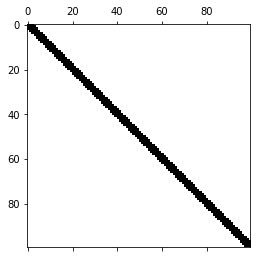

In [25]:
# (a)
# Just show the structure when n = 100.
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [26]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

Conjugate Gradient Method without preconditioner

In [27]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 15033 / Backward error: 6.66205e-11


Jacobi preconditioner

In [28]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 30 / Backward error: 4.305e-12


Gauss-Seidel preconditioner

In [29]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 10 / Backward error: 1.48701e-10


### Q. 7

In [30]:
def A_ij(n):
    A = np.zeros((n, n))
    for i in range(n - 2):
        A[i, i] = i+1
        A[i, i+1] = 0.5
        A[i+1, i] = 0.5
        A[i, i+2] = 0.5
        A[i+2, i] = 0.5
        
    A[-2, -2] = n - 1
    A[-1, -1] = n
    A[-2, -1] = 0.5
    A[-1, -2] = 0.5
    
    for i in range(n//2):
        A[i, 2*i + 1] = 0.5
        A[2*i + 1, i] = 0.5
    
    return A

n = 1000
A = A_ij(n)

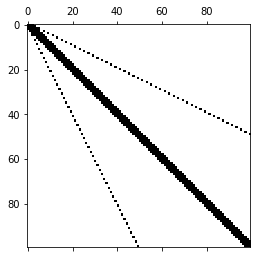

In [31]:
# (a)
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [32]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

Conjugate Gradient Method without preconditioner

In [33]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 15042 / Backward error: 2.67804e-11


Jacobi preconditioner

In [34]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 30 / Backward error: 6.27631e-12


Gauss-Seidel preconditioner

In [35]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 11 / Backward error: 1.00044e-11


### Q. 8

In [36]:
def A_ij(n):
    A = np.zeros((n, n))
    
    for i in range(n):
        try:
            A[i, i] = 2
            A[i, i+2] = 0.5
            A[i+2, i] = 0.5
            A[i, i+4] = 0.5
            A[i+4, i] = 0.5
        except:
            pass
        
    for i in range(n-5):
        A[-1, i] = -0.1
        A[i, -1] = -0.1

    return A

n = 500
A = A_ij(n)

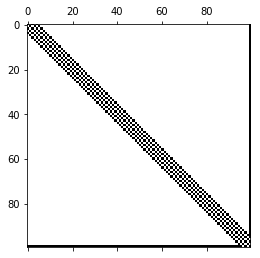

In [37]:
# (a)
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [38]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

Conjugate Gradient Method without preconditioner

In [39]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 208 / Backward error: 1.39959e-11


Jacobi preconditioner

In [40]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 208 / Backward error: 1.39959e-11


Gauss-Seidel preconditioner

In [41]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 38 / Backward error: 4.85443e-11


### Q. 9

In [42]:
def A_ij(n):
    A = np.zeros((n, n))
    
    for i in range(n):
        try:
            A[i, i] = (i+1)**(1/3)
            A[i, i+2] = 0.5
            A[i+2, i] = 0.5
            A[i, i+4] = 0.5
            A[i+4, i] = 0.5
        except:
            pass
        
    for i in range(n-5):
        A[-1, i] = -0.1
        A[i, -1] = -0.1

    return A

n = 500
A = A_ij(n)

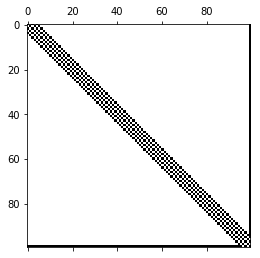

In [43]:
# (a)
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [44]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

Conjugate Gradient Method without preconditioner

In [45]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 208 / Backward error: 5.00222e-11


Jacobi preconditioner

In [46]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 53 / Backward error: 5.01581e-11


Gauss-Seidel preconditioner

In [47]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 14 / Backward error: 3.85256e-11


### Q. 10

In [48]:
def A_ij(n):
    A = np.zeros((4*n, 4*n))
    C = np.zeros((n, n))
    
    for i in range(n):
        C[i, i] = 2
        try:
            C[i, i+3] = 0.1
            C[i+3, i] = 0.1
            C[i, i+39] = 0.5
            C[i+39, i] = 0.5
            C[i, i+42] = 0.5
            C[i+42, i] = 0.5
        except:
            pass
            
    for i in range(4):
        A[i*n:(i+1)*n, i*n:(i+1)*n] = C
        try:
            A[(i+1)*n:(i+2)*n, i*n:(i+1)*n] = C/2
            A[i*n:(i+1)*n, (i+1)*n:(i+2)*n] = C/2
        except:
            pass
        
    return A

n = 195
A = A_ij(n)

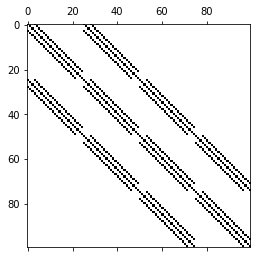

In [49]:
# (a)
plt.matshow(A_ij(25) != 0, cmap='binary')
plt.show()

In [50]:
# (b)
x_e = np.ones(4*n)
b = A.dot(x_e)
tol = 1e-10

Conjugate Gradient Method without preconditioner

In [51]:
iter_n = 0
x = np.zeros(4*n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 213 / Backward error: 4.6203e-11


Jacobi preconditioner

In [52]:
iter_n = 0
x = np.zeros(4*n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 213 / Backward error: 4.6203e-11


Gauss-Seidel preconditioner

In [53]:
iter_n = 0
x = np.zeros(4*n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    iter_n += 1
    if abs(x - x_e).max() < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 69 / Backward error: 2.0127e-11
